In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [3]:
df=pd.read_csv('/content/drive/MyDrive/project/diabities.csv')

In [4]:
df.head(10)

,names,Location,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,Priya Patel,Mumbai,6,148,72.0,35,169.5,33.6,0.627,50,1
1,Deepika Sharma,Delhi,1,85,66.0,29,102.5,26.6,0.351,31,0
2,Anjali Singh,Bangalore,8,183,64.0,32,169.5,23.3,0.672,32,1
3,Neha Gupta,Kolkata,1,89,66.0,23,94.0,28.1,0.167,21,0
4,Shreya Shah,Chennai,0,137,40.0,35,168.0,43.1,2.288,33,1
5,Aarti Verma,Hyderabad,5,116,74.0,27,102.5,25.6,0.201,30,0
6,Pooja Desai,Pune,3,78,50.0,32,88.0,31.0,0.248,26,1
7,Nisha Reddy,Ahmedabad,10,115,70.0,27,102.5,35.3,0.134,29,0
8,Ritu Jain,Surat,2,197,70.0,45,543.0,30.5,0.158,53,1
9,Divya Mishra,Jaipur,8,125,96.0,32,169.5,34.3,0.232,54,1


In [5]:
df.columns

Index(['names', 'Location', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Outcome'],
      dtype='object')

In [6]:
df.shape

(768, 11)

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.389323,29.089844,141.753906,32.434635,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.106039,8.890820,89.100847,6.880498,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.isnull().sum()

names                       0
Location                    0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.nunique()

names                       399
Location                    237
Pregnancies                  17
Glucose                     135
BloodPressure                47
SkinThickness                50
Insulin                     187
BMI                         247
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [ ]:
for col in df.columns:
    print("-----------------{}-----------------".format(col))
    print(df[col].value_counts())

    print("              ")

In [11]:
columns_to_plot=[ 'Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age']

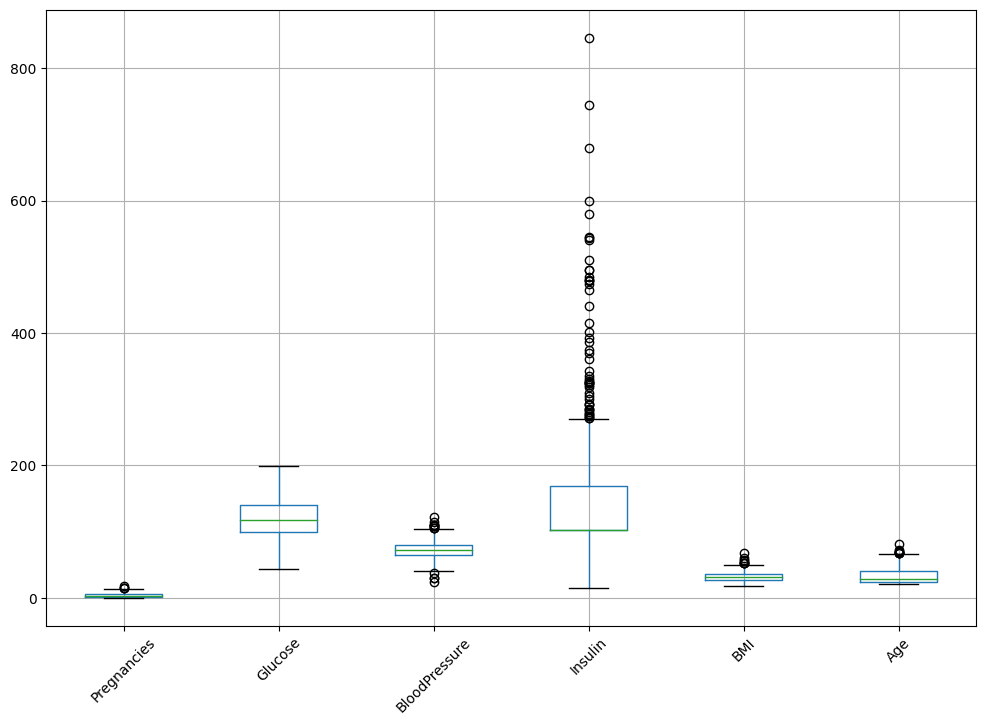

In [12]:
plt.figure(figsize=(12,8))
df[columns_to_plot].boxplot()
plt.xticks(rotation=45)  # Rotate column names 45 degrees
plt.show()

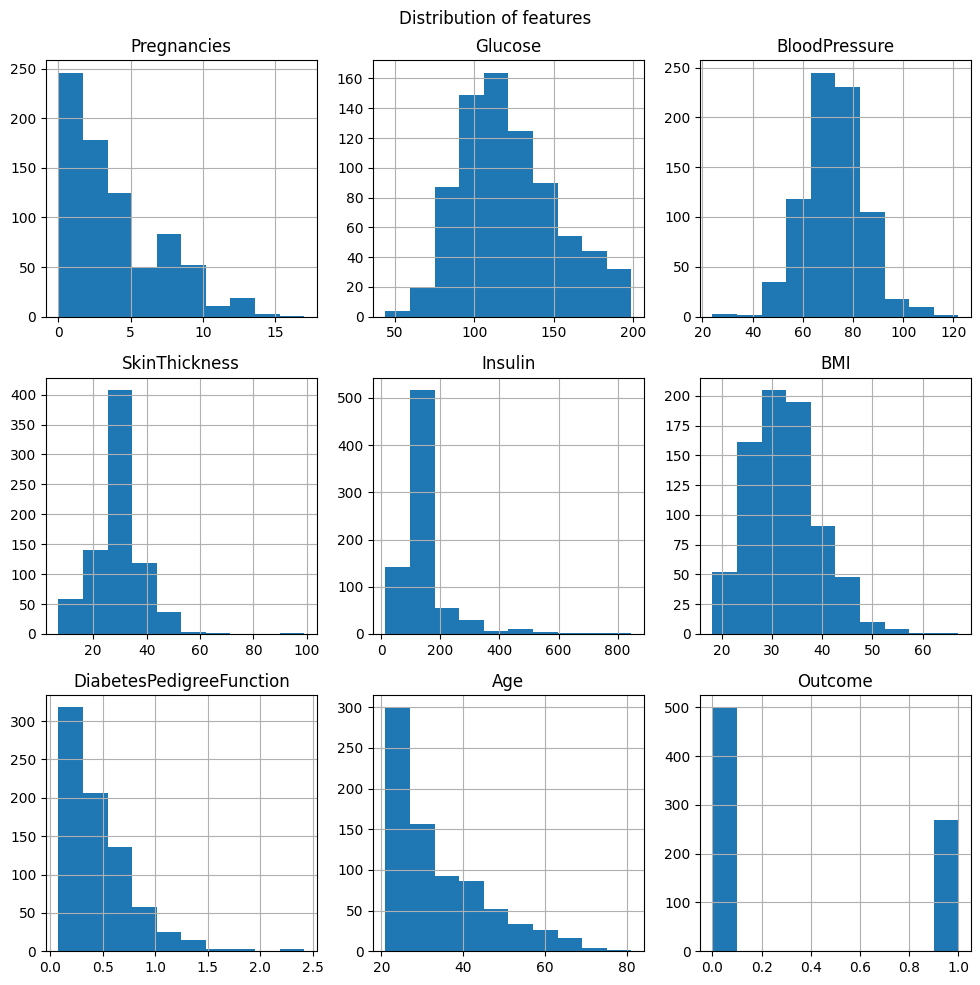

In [46]:
# Distribution plots (histograms) # used to see how often values occur
df.hist(figsize=(10, 10))
plt.suptitle('Distribution of features')
plt.tight_layout()
plt.show()

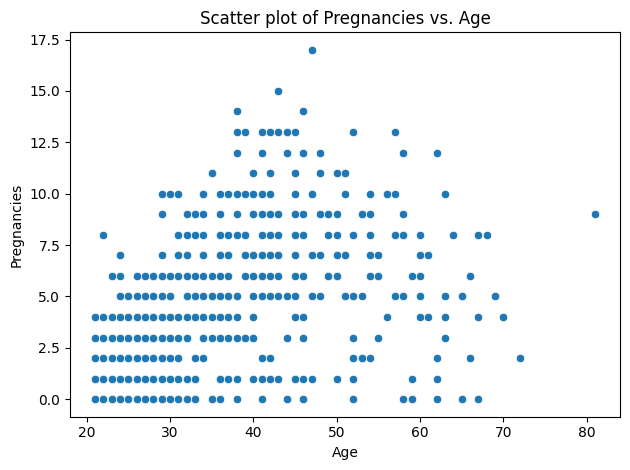

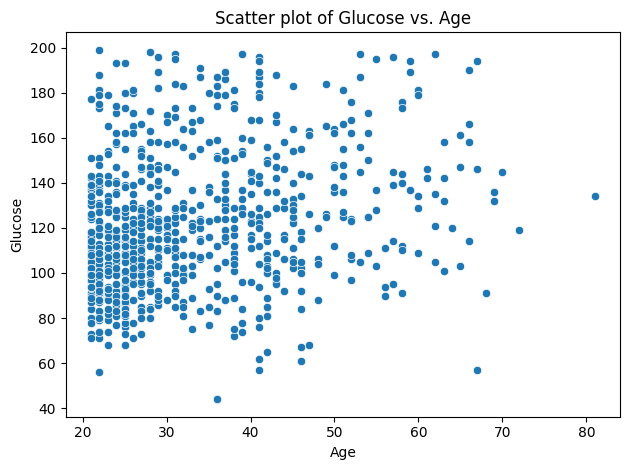

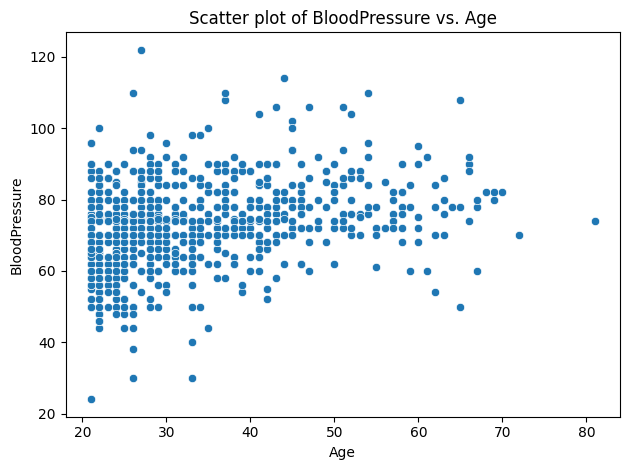

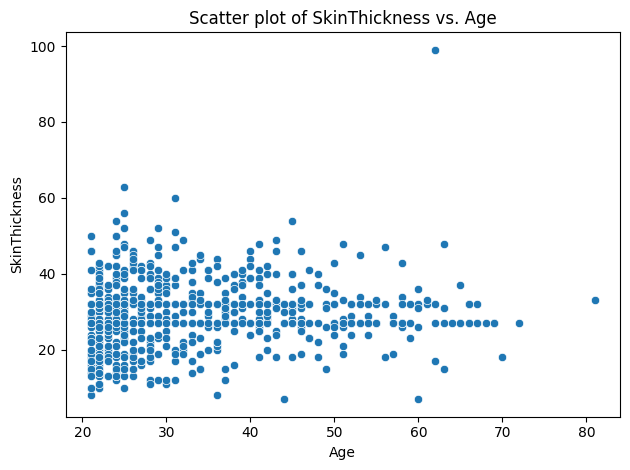

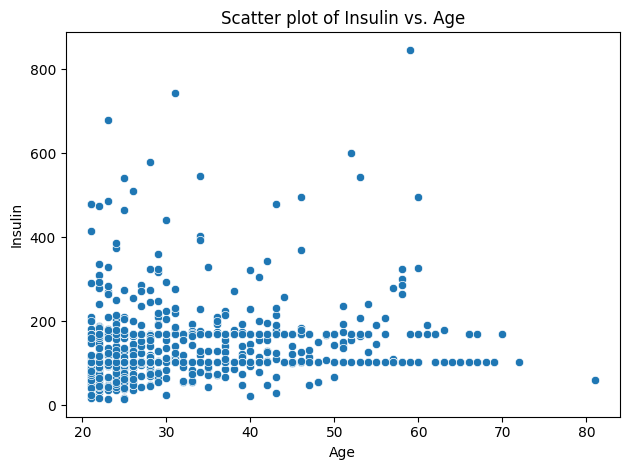

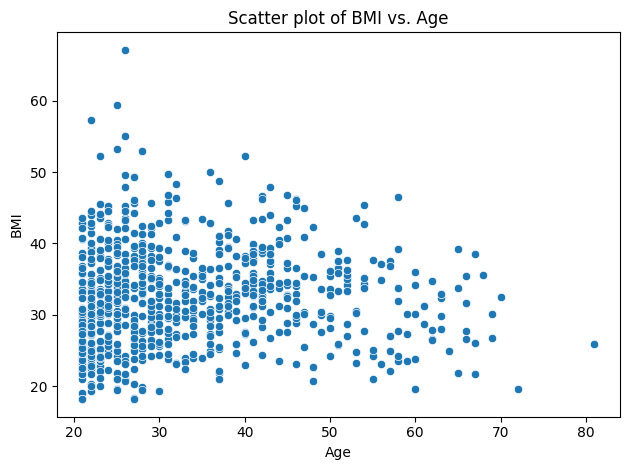

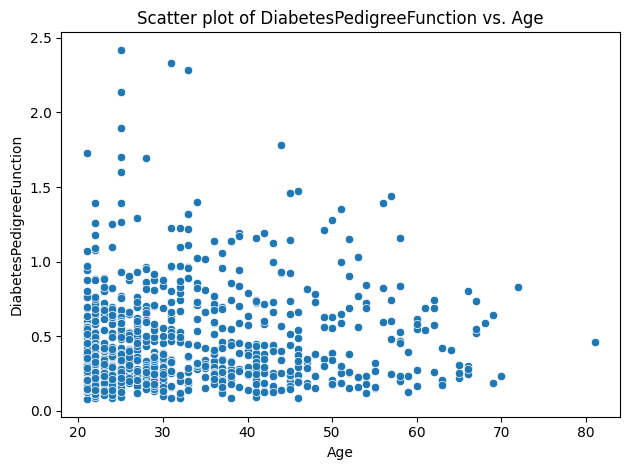

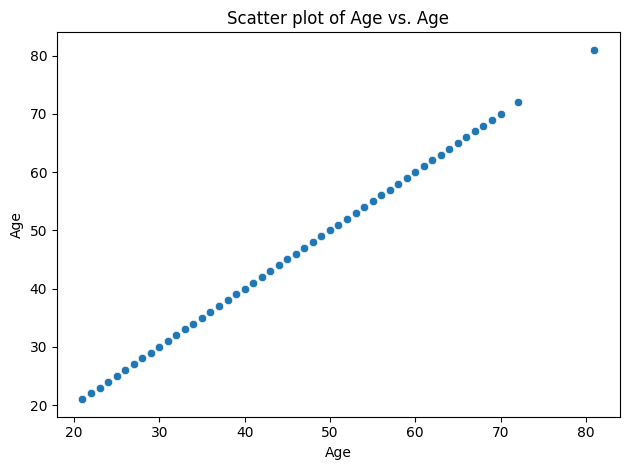

In [47]:
# Scatterplots Used to visualize the relationship between two points
for col in df.columns[2:-1]:
  sns.scatterplot(x='Age', y=col, data=df)
  plt.xlabel('Age')
  plt.ylabel(col)
  plt.title(f'Scatter plot of {col} vs. Age')
  plt.tight_layout()
  plt.show()

In [48]:
Total_diabetic=df[df["Outcome"]==1]
Total_diabetic.count()

names                       268
Location                    268
Pregnancies                 268
Glucose                     268
BloodPressure               268
SkinThickness               268
Insulin                     268
BMI                         268
DiabetesPedigreeFunction    268
Age                         268
Outcome                     268
dtype: int64

In [49]:
# data of overweight women that are diabetic
page = df[((df.apply(lambda x: (18.5 <= x['BMI'] <= 24.9) if 21 <= x['Age'] <= 39 else (18.5 <= x['BMI'] <= 25.9) if 40 <= x['Age'] <= 59 else (18.5 <= x['BMI'] <= 27.0) if 60 <= x['Age'] <= 79 else (18.5 <= x['BMI'] <= 27.0), axis=1))& (df["Outcome"]==1))]
page

,names,Location,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,Anjali Singh,Bangalore,8,183,64.0,32,169.5,23.3,0.672,32,1
14,Swati Malhotra,Indore,5,166,72.0,19,175.0,25.8,0.587,51,1
93,Kiran Verma,Belgaum,4,134,72.0,32,169.5,23.8,0.277,60,1
197,Sonam Agarwal,Naihati,3,107,62.0,13,48.0,22.9,0.678,23,1
306,Rhea Sharma,Aligarh,10,161,68.0,23,132.0,25.5,0.326,47,1
319,Maya Malhotra,Jamshedpur,6,194,78.0,32,169.5,23.5,0.129,59,1
498,Anjali Sharma,Serampore,7,195,70.0,33,145.0,25.1,0.163,55,1
646,Savita Sharma,Arrah,1,167,74.0,17,144.0,23.4,0.447,33,1
676,Shreya Sharma,Baranagar,9,156,86.0,32,169.5,24.8,0.230,53,1
749,Kalyani Sharma,Danapur,6,162,62.0,32,169.5,24.3,0.178,50,1


In [50]:
# underweight women with diabities according to data
page2 = df[(df.apply(lambda x: (x['BMI'] < 18.5) if 21 <= x['Age'] <= 39 else (x['BMI'] < 18.5) if 40 <= x['Age'] <= 59 else (x['BMI'] < 18.5) if 60 <= x['Age'] <= 79 else (x['BMI'] < 18.5), axis=1))& (df["Outcome"]==1)]
page2

,names,Location,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


# selecting columns

In [51]:
df_filtered=df.drop(columns=['names', 'Location']).copy()

In [52]:
df_filtered

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,169.5,33.6,0.627,50,1
1,1,85,66.0,29,102.5,26.6,0.351,31,0
2,8,183,64.0,32,169.5,23.3,0.672,32,1
3,1,89,66.0,23,94.0,28.1,0.167,21,0
4,0,137,40.0,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180.0,32.9,0.171,63,0
764,2,122,70.0,27,102.5,36.8,0.340,27,0
765,5,121,72.0,23,112.0,26.2,0.245,30,0
766,1,126,60.0,32,169.5,30.1,0.349,47,1


# Splitting Data
Splitting the target variable in y and all the other features in X

In [53]:
X = df_filtered.drop('Outcome',axis=1)
y = df_filtered.Outcome

# Random Forest

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 5)


In [55]:
rf = RandomForestClassifier(n_estimators = 108, random_state = 5)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=108, random_state=5)

In [56]:
#understand this
prediction_randomforest = rf.predict(X_test)

In [57]:
accuracy_randomforest = (rf.score(X_test, y_test)*100)
accuracy_randomforest

92.85714285714286

# Decision Tree

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 5)


In [59]:
model_dt = DecisionTreeClassifier(random_state=5)
model_dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=5)

In [60]:
prediction_decisiontree=model_dt.predict(X_test)

In [61]:
accuracy_decisiontree=(model_dt.score(X_test, y_test)*100)
accuracy_decisiontree

87.01298701298701

# Logistic Regression

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 5)


In [63]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [64]:
#creating a model
model_lr=LogisticRegression()

#fitting training data to the model
model_lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
#predict using the model
prediction_logisticregression=model_lr.predict(X_test)

In [66]:
accuracy_logisticregression=(accuracy_score(y_test, prediction_logisticregression)*100)
accuracy_logisticregression

79.22077922077922

# KNN

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 5)


In [68]:
#predicting using the KNeighbors_Classifier
model_KNN = KNeighborsClassifier(n_neighbors=7)

#fit the model on the data and predict the values
model_KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [69]:
prediction_knn= model_KNN.predict(X_test)


In [70]:
accuracy_knn=(model_KNN.score(X_test, y_test)*100)
accuracy_knn

90.25974025974025

# svm

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 5)


In [72]:
svm_model=SVC()  #support vector classifier

svm_model.fit(X_train, y_train)


SVC()

In [73]:
prediction_svm = svm_model.predict(X_test)


In [74]:
accuracy_svm = (svm_model.score(X_test, y_test) *100)
accuracy_svm

87.01298701298701

# Plotting Accuracy Score chart

Text(0.5, 1.0, 'Accuracy Scores Comparison')

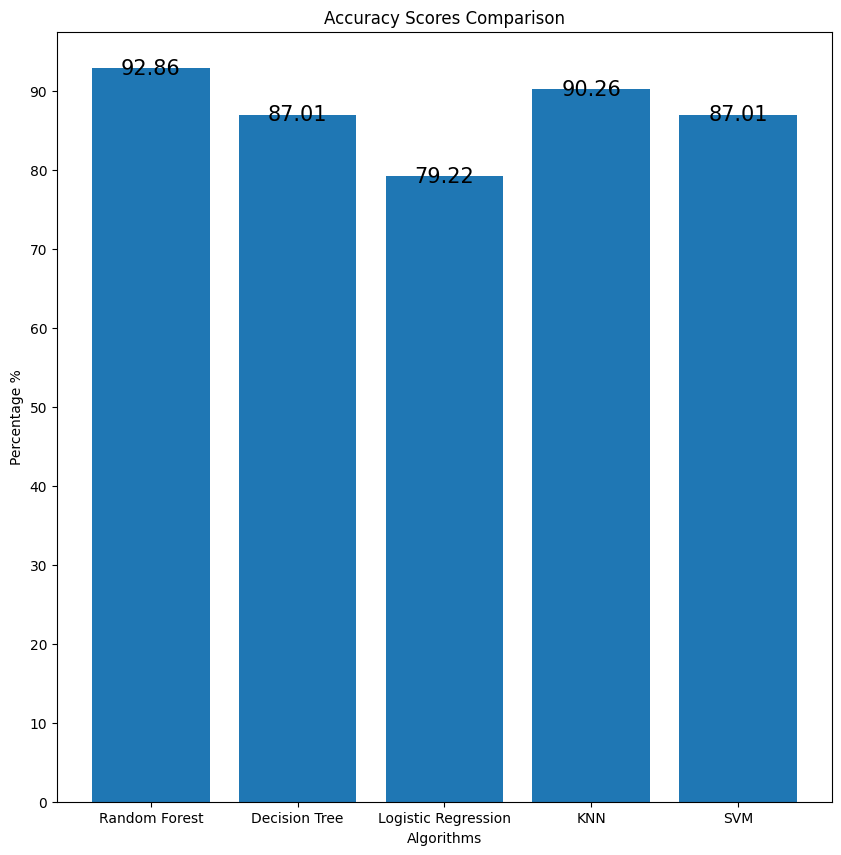

In [75]:
Accuracy_Score = ["Random Forest", "Decision Tree", "Logistic Regression", "KNN", "SVM"]

plt.figure(figsize=(10,10))
a=plt.bar(Accuracy_Score, [accuracy_randomforest,accuracy_decisiontree,accuracy_logisticregression,accuracy_knn,accuracy_svm])
plt.yticks(np.arange(0,100,10))
plt.ylabel('Percentage %')
plt.xlabel('Algorithms')

# Annotate each bar with its height
for bar in plt.gca().patches:  # Use plt.gca() to access the current axes
    x_pos = bar.get_x() + bar.get_width() / 2
    y_pos = bar.get_height()
    plt.text(x_pos, y_pos, format(y_pos, '.2f'), ha='center', va='center', size=15)

plt.title('Accuracy Scores Comparison')



In [76]:
New_Data = pd.DataFrame()
New_Data = X_test
New_Data["Outcome"]=y_test
New_Data["prediction_randomforest"]=prediction_randomforest
New_Data["prediction_decisiontree"]=prediction_decisiontree
New_Data["prediction_logisticregression"]=prediction_logisticregression
New_Data["prediction_knn"]=prediction_knn
New_Data["prediction_svm"]=prediction_svm

New_Data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,prediction_randomforest,prediction_decisiontree,prediction_logisticregression,prediction_knn,prediction_svm
567,6,92,62.0,32,126.0,32.0,0.085,46,0,0,0,0,0,0
123,5,132,80.0,27,102.5,26.8,0.186,69,0,0,0,0,0,0
615,3,106,72.0,27,102.5,25.8,0.207,27,0,0,0,0,0,0
492,4,99,68.0,38,102.5,32.8,0.145,33,0,0,0,0,0,0
288,4,96,56.0,17,49.0,20.8,0.340,26,0,0,0,0,0,0
383,1,90,62.0,18,59.0,25.1,1.268,25,0,0,0,0,0,0
642,6,147,80.0,32,169.5,29.5,0.178,50,1,1,1,0,1,1
178,5,143,78.0,27,102.5,45.0,0.190,47,0,0,0,0,0,0
84,5,137,108.0,32,169.5,48.8,0.227,37,1,1,1,0,1,1
594,6,123,72.0,45,230.0,33.6,0.733,34,0,1,1,1,0,1


In [77]:
!pip install gradio

In [80]:
import gradio as gr
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    random_state = 5)
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=108, random_state=5)
rf.fit(X_train, y_train)

def diabetes_prediction(pregnancies, glucose, blood_pressure, skin_thickness,
                        insulin, bmi, diabetes_pedigree_function, age):

    data = np.array([[pregnancies, glucose, blood_pressure, skin_thickness,
                       insulin, bmi, diabetes_pedigree_function, age]])  # Ensure single-row input

    prediction = rf.predict(data)[0]

    # Convert the prediction probability to a descriptive label
    if prediction > 0.5:
        predicted_label = "Positive (High Risk)"
    else:
        predicted_label = "Negative (Low Risk)"

    return predicted_label

# Create the Gradio interface with informative descriptions
interface = gr.Interface(
    fn=diabetes_prediction,
    inputs=[
        gr.Number(label="Pregnancies"),
        gr.Number(label="Glucose (mg/dL) / {70-140 mg/dL (fasting)}"),
        gr.Number(label="Blood Pressure (mmHg) / 60-120 normal"),
        gr.Number(label="Skin Thickness (mm) / 20-35 mm"),
        gr.Number(label="Insulin (μU/mL) / 2-25 μIU/mL (fasting)"),
        gr.Number(label="BMI (kg/m²) /  18.5-24.9 (normal weight), 25-29.9 (overweight), 30+ (obese)"),
        gr.Number(label="Diabetes Pedigree Function /  0-1 (higher values i ndicate increased risk)"),
        gr.Number(label="Age (years)")
    ],
    outputs=[gr.Text(label="Prediction")], #diabetes_prediction=X_train,
    title="Diabetes Prediction for Women",
    description=" The model Predict the likelihood of diabetes in women using patient data.",
    ).launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://62e93ba2e624d704bc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
